In [1]:
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common import make_vec_env
from stable_baselines import A2C
from stable_baselines.common.env_checker import check_env

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



defaultdict(<class 'list'>, {0: [1, 2, 3], 1: [2, 3], 2: [3, 4, 5], 3: [4, 5], 4: [5, 10], 5: [6], 6: [7, 8], 7: [8], 8: [9], 9: [10]})


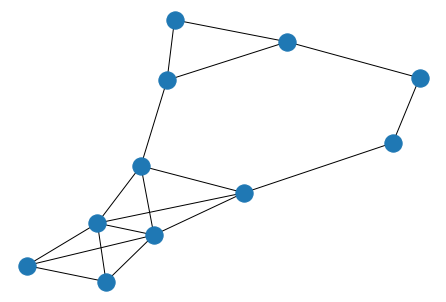

In [2]:
import gym
import w_mac
from collections import defaultdict
import matplotlib as plt
import networkx as nx

# data = [(0,2),(0,1),(1,2),(2,3),(2,4),(3,4)]
data = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5),(4,10),(5,6),(6,7),(6,8),(7,8),(8,9),(9,10)]
d = defaultdict(list)
#data = [(0,2),(0,1),(0,3),(1,2),(1,3),(2,3),(2,4),(3,4),(5,2),(5,3),(5,4)]
# defaultdict(<type 'list'>, {})
for node, dest in data:
    d[node].append(dest)
print(d)

G = nx.Graph()
for k,v in d.items():
    for vv in v:
        G.add_edge(k,vv)
nx.draw(G)

In [ ]:
env = gym.make('wmac-graph-v0',graph=G)
env.reset()

self.collision_domain {5: [0, 1, 2, 3], 9: [2, 3, 4, 5], 11: [4, 10], 13: [5, 6], 18: [9, 10], 16: [6, 7, 8], 19: [8, 9]}
self.node_in_domains :  {0: [5], 1: [5], 2: [5, 9], 3: [5, 9], 4: [9, 11], 5: [9, 13], 10: [11, 18], 6: [13, 16], 9: [18, 19], 7: [16], 8: [16, 19]}


In [ ]:
check_env(env)

In [ ]:
model = A2C(MlpPolicy, env, verbose=1,tensorboard_log="./tensorboard/")
model.learn(total_timesteps=150000)
model.save("a2c_wmac")

In [ ]:
del model # remove to demonstrate saving and loading

In [ ]:
model = A2C.load("a2c_wmac")

obs = env.reset()
count = 0
while count < 100:
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    count = count + 1
    print("count :", count)
    if done:
        break
    
    #env.render()